# A Data-Driven Exploration of the US Online Superstore

This data analysis project delves into customer behavior and profitability within our superstore. By leveraging sales data, we aim to uncover actionable insights to optimize our strategies across various regions, customer segments, and product categories.

Data source: [US Superstore Data](https://www.kaggle.com/datasets/juhi1994/superstore)

## Getting our tools ready

In [57]:
# Importing library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import LabelEncoder
import os

Let's open the information and see what the first few lines look like.

In [58]:
file_path = os.path.join('..', 'data', 'us_superstore_data.xls')

df=pd.read_excel(file_path, engine='xlrd')
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


## Getting to know our data better

Before we dive in, let's get a sense of the data we're working with. How much information do we have to explore?

In [59]:
df.shape

(9994, 21)

With nearly 10,000 rows of data and 21 unique columns, we have a comprehensive dataset to explore customer behavior within our online store. Let's delve deeper and see what valuable information each column holds.

In [60]:
# Show column names
df.columns

Index(['Row ID', 'Order ID', 'Order Date', 'Ship Date', 'Ship Mode',
       'Customer ID', 'Customer Name', 'Segment', 'Country', 'City', 'State',
       'Postal Code', 'Region', 'Product ID', 'Category', 'Sub-Category',
       'Product Name', 'Sales', 'Quantity', 'Discount', 'Profit'],
      dtype='object')

In [61]:
# See what kind of data is in each column
df.dtypes

Row ID                    int64
Order ID                 object
Order Date       datetime64[ns]
Ship Date        datetime64[ns]
Ship Mode                object
Customer ID              object
Customer Name            object
Segment                  object
Country                  object
City                     object
State                    object
Postal Code               int64
Region                   object
Product ID               object
Category                 object
Sub-Category             object
Product Name             object
Sales                   float64
Quantity                  int64
Discount                float64
Profit                  float64
dtype: object

To ensure the accuracy of our insights, let's take a moment to see if there are any missing values in the data. Missing data points can sometimes skew the results.

In [62]:
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

Since we didn't find any blank spaces in our data, we can jump right into exploring it!  
But first, let's take a quick look at the columns themselves.  
There might be some extra ones we don't actually need.

For example, the "Row ID" column seems like it's just numbering each row, so we can get rid of that one.

In [63]:
df=df.drop('Row ID',axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


It looks like all the data is from the US. Since we only care about US data for now, we can take out the "Country" column. That way, we can focus on the other information we have.

In [64]:
# Taking out Country column
df=df.drop('Country',axis=1)
df.head()

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


**To learn more about our data, let's break it down in two ways:**

- Product-level analysis: This will show us how well each product is selling.
- Customer-level analysis: This will show us what customers are buying from us and how often they shop with us.

## Let's start by seeing what kind of things customers can buy

We can categorize these things to understand the different options available.

In [65]:
df['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

Let's explore the distribution of products across categories. This will show us which categories have the most options for our customers.

In [66]:
# Number of products in each category
df['Category'].value_counts()

Category
Office Supplies    6026
Furniture          2121
Technology         1847
Name: count, dtype: int64

How many subcategories do we have within our main categories?

In [67]:
# Number of Sub-Categories
df['Sub-Category'].nunique()

17

How many products fall into each subcategory? 

This will reveal how our product variety is distributed across different subcategories, helping us identify areas of strength and potential gaps.

In [68]:
# Number of products divided by Sub-Categories
df['Sub-Category'].value_counts()

Sub-Category
Binders        1523
Paper          1370
Furnishings     957
Phones          889
Storage         846
Art             796
Accessories     775
Chairs          617
Appliances      466
Labels          364
Tables          319
Envelopes       254
Bookcases       228
Fasteners       217
Supplies        190
Machines        115
Copiers          68
Name: count, dtype: int64

Let's see how many things are in each Sub-Category, compared to the main category.

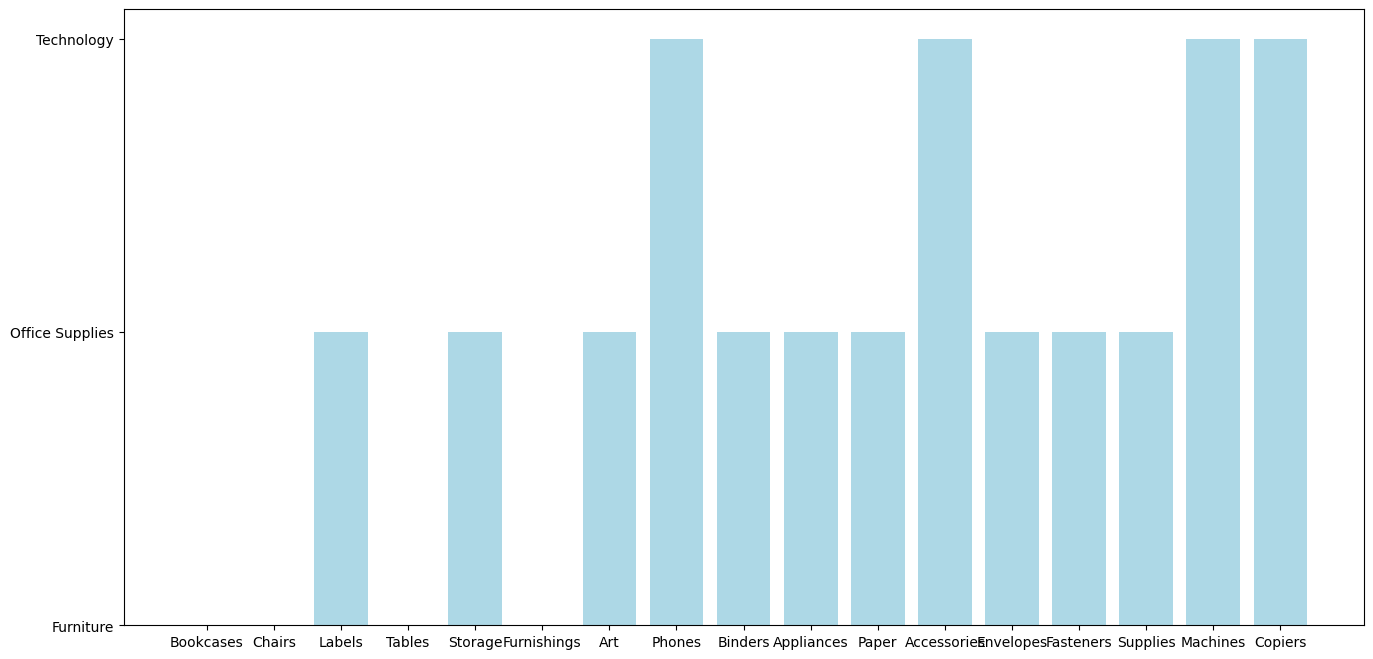

In [69]:
plt.figure(figsize=(16,8))
plt.bar('Sub-Category', 'Category', data=df, color='lightblue')
plt.show()

By exploring this graph, you can see the variety of products offered within each subcategory. This can help you identify potential options to consider when purchasing a product.

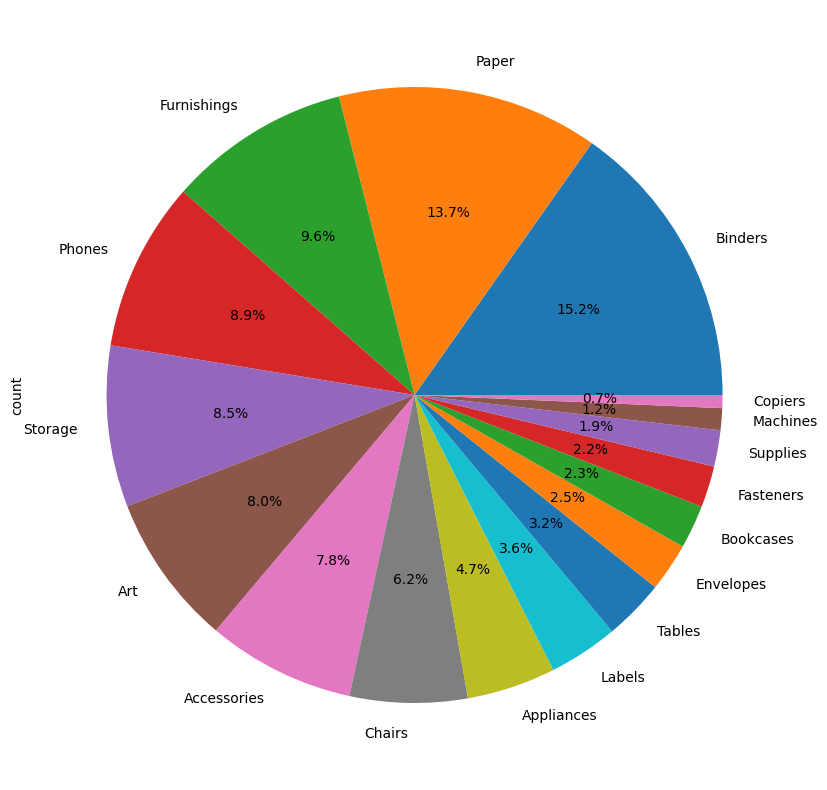

In [70]:
plt.figure(figsize=(12,10))
df['Sub-Category'].value_counts().plot.pie(autopct="%1.1f%%")
plt.show()

This store has a lot of different office supplies to choose from, especially things for organizing your desk (binders) and writing (paper).

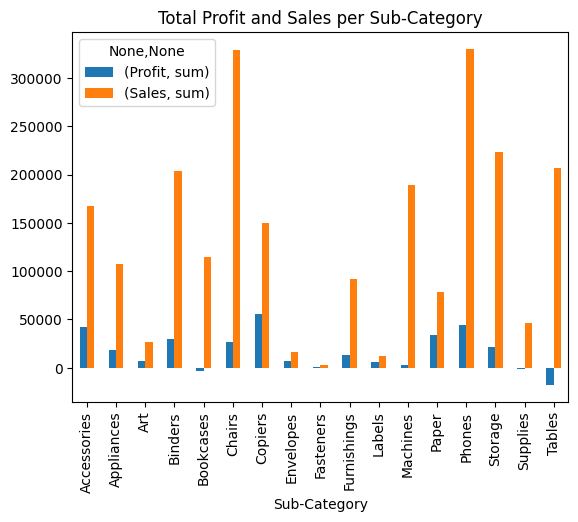

In [71]:
df.groupby('Sub-Category')[['Profit','Sales']].agg(['sum']).plot.bar()
plt.title('Total Profit and Sales per Sub-Category')
#plt.legend()
plt.show()

Copiers make the most profit for the store. Chairs and Phones cost a lot more than other things they sell.

On another note, it seems not many people buy Tables and Bookcases at the store, so these departments are losing money.

How many unique items do we have to offer our customers?

In [72]:
# Total products in store
df['Product Name'].nunique()

1850

Let's see how many times each product name shows up. This will tell us if some products are much more popular than others.

In [73]:
df['Product Name'].value_counts()

Product Name
Staple envelope                                                                        48
Staples                                                                                46
Easy-staple paper                                                                      46
Avery Non-Stick Binders                                                                20
Staples in misc. colors                                                                19
                                                                                       ..
Boston 1900 Electric Pencil Sharpener                                                   1
RCA ViSYS 25423RE1 Corded phone                                                         1
Canon Color ImageCLASS MF8580Cdw Wireless Laser All-In-One Printer, Copier, Scanner     1
Newell 342                                                                              1
Eldon Jumbo ProFile Portable File Boxes Graphite/Black                                 

Top 10 products distribution

<Axes: ylabel='count'>

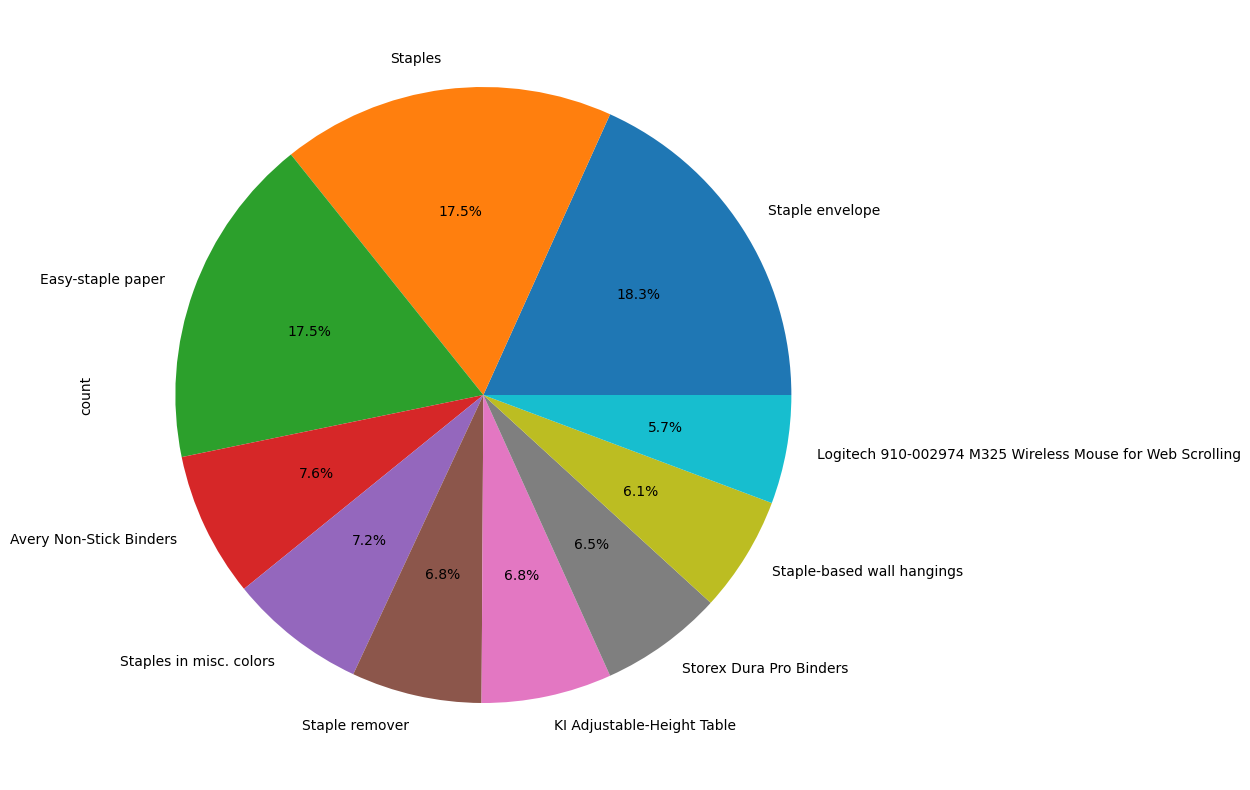

In [74]:
# Top 10 products distribution
plt.figure(figsize=(12,10))
df['Product Name'].value_counts().head(10).plot.pie(autopct="%1.1f%%")

Number of Sub-Categories by Region

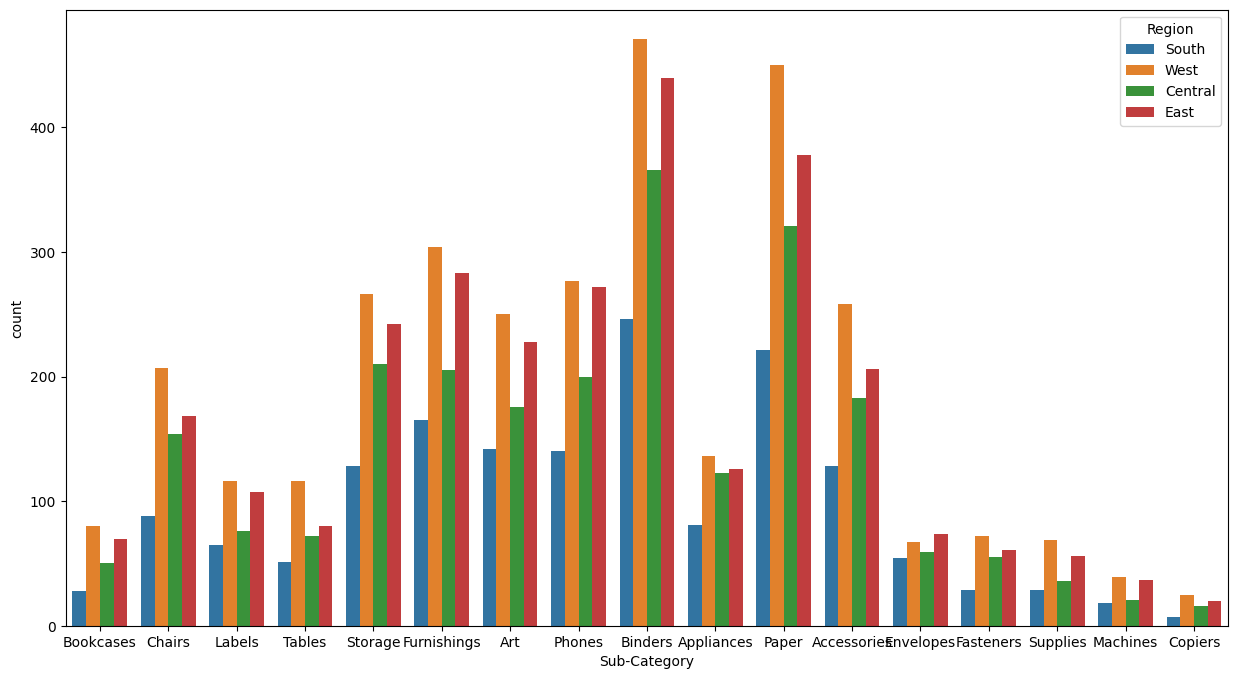

In [75]:
# Number of Sub-Categories by Region
plt.figure(figsize=(15,8))
sns.countplot(x="Sub-Category", hue="Region", data=df)
plt.show()

Our analysis reveals a distinct regional trend: customers in the western United States tend to place more orders from our superstore compared to other regions. This finding suggests potential variations in customer needs or shopping preferences across the country.

To make sense of all this information, let's add some extra details to our data, like how much each item costs and what percentage of profit each sale makes.

In [76]:
df['Cost']=df['Sales']-df['Profit']
df['Cost'].head()

0     220.0464
1     512.3580
2       7.7486
3    1340.6085
4      19.8516
Name: Cost, dtype: float64

In [77]:
df['Profit %']=(df['Profit']/df['Cost'])*100

Profit percentage of first 5 product names

In [78]:
# Profit percentage of first 5 product names
df.iloc[[0,1,2,3,4],[14,20]]

,Product Name,Profit %
0,Bush Somerset Collection Bookcase,19.047619
1,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",42.857143
2,Self-Adhesive Address Labels for Typewriters b...,88.679245
3,Bretford CR4500 Series Slim Rectangular Table,-28.571429
4,Eldon Fold 'N Roll Cart System,12.676056


Let's see which products make the most profit!

In [79]:
df.sort_values(['Profit %','Product Name'],ascending=False).groupby('Profit %').head(5)

,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,City,State,Postal Code,...,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,Cost,Profit %
1696,CA-2015-156335,2015-09-25,2015-09-28,Second Class,PO-19195,Phillina Ober,Home Office,Bayonne,New Jersey,7002,...,TEC-PH-10002726,Technology,Phones,netTALK DUO VoIP Telephone Service,104.980,2,0.0,52.4900,52.4900,100.000000
4611,CA-2016-109407,2016-01-24,2016-01-26,Second Class,HG-14965,Henry Goldwyn,Corporate,Gulfport,Mississippi,39503,...,OFF-BI-10000285,Office Supplies,Binders,XtraLife ClearVue Slant-D Ring Binders by Card...,31.360,4,0.0,15.6800,15.6800,100.000000
3984,CA-2016-135265,2016-07-07,2016-07-09,Second Class,CC-12370,Christopher Conant,Consumer,Los Angeles,California,90045,...,OFF-PA-10002923,Office Supplies,Paper,Xerox 1942,48.940,1,0.0,24.4700,24.4700,100.000000
4651,CA-2017-150987,2017-04-08,2017-04-12,Standard Class,AH-10120,Adrian Hane,Home Office,San Francisco,California,94110,...,OFF-PA-10002923,Office Supplies,Paper,Xerox 1942,195.760,4,0.0,97.8800,97.8800,100.000000
6600,CA-2014-154095,2014-12-02,2014-12-07,Standard Class,ON-18715,Odella Nelson,Corporate,Clinton,Maryland,20735,...,OFF-PA-10002923,Office Supplies,Paper,Xerox 1942,146.820,3,0.0,73.4100,73.4100,100.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8916,US-2016-144057,2016-05-09,2016-05-13,Standard Class,CV-12805,Cynthia Voltz,Corporate,Austin,Texas,78745,...,OFF-AP-10000390,Office Supplies,Appliances,Euro Pro Shark Stick Mini Vacuum,48.784,4,0.8,-131.7168,180.5008,-72.972973
8766,CA-2015-107083,2015-11-21,2015-11-27,Standard Class,BB-11545,Brenda Bowman,Corporate,Fort Worth,Texas,76106,...,OFF-AP-10004136,Office Supplies,Appliances,Kensington 6 Outlet SmartSocket Surge Protector,24.588,3,0.8,-67.6170,92.2050,-73.333333
676,US-2017-119438,2017-03-18,2017-03-23,Standard Class,CD-11980,Carol Darley,Consumer,Tyler,Texas,75701,...,OFF-AP-10000804,Office Supplies,Appliances,Hoover Portapower Portable Vacuum,2.688,3,0.8,-7.3920,10.0800,-73.333333
261,US-2017-155299,2017-06-08,2017-06-12,Standard Class,Dl-13600,Dorris liebe,Corporate,Pasadena,Texas,77506,...,OFF-AP-10002203,Office Supplies,Appliances,Eureka Disposable Bags for Sanitaire Vibra Gro...,1.624,2,0.8,-4.4660,6.0900,-73.333333


Phone, Binders, and Papers tend to be very profitable items for retailers to sell.

## Now, let's see how things look for individual customers.

How many unique individuals have chosen to shop with us?

In [80]:
df['Customer ID'].nunique()

793

Who are the 10 customers who buy the most from us?

In [81]:
df_top10=df['Customer Name'].value_counts().head(10)
df_top10

Customer Name
William Brown          37
John Lee               34
Matt Abelman           34
Paul Prost             34
Chloris Kastensmidt    32
Seth Vernon            32
Jonathan Doherty       32
Edward Hooks           32
Zuschuss Carroll       31
Emily Phan             31
Name: count, dtype: int64

<Figure size 1000x800 with 0 Axes>

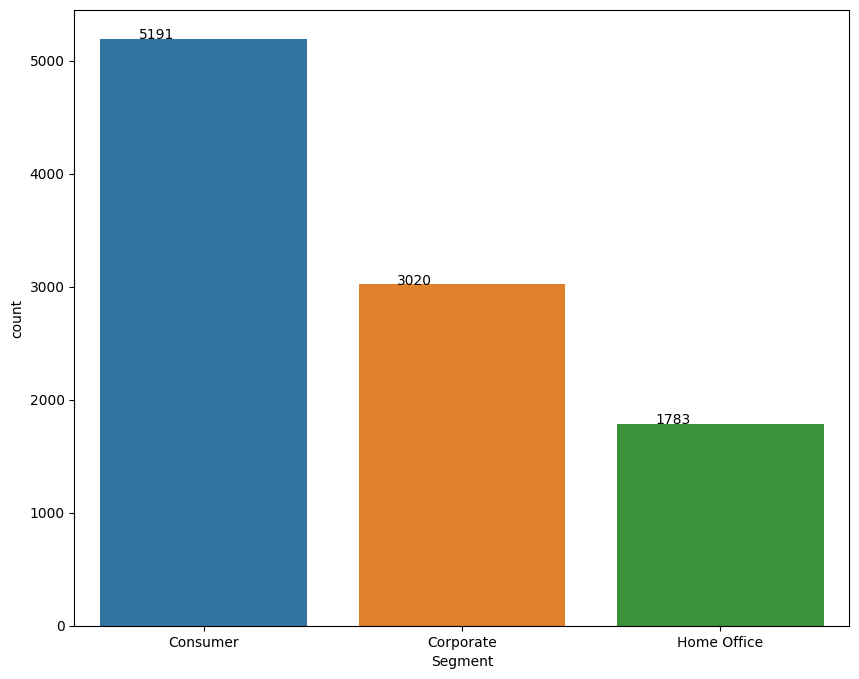

In [82]:
fig=plt.figure(figsize=(10,8))
fig, ax = plt.subplots(figsize=(10, 8))  # Create figure and axes together
sns.countplot(x='Segment', data=df, ax=ax)  # Pass data and axes to countplot

# Loop through patches and add annotations
for patch in ax.patches:
    x = patch.get_x() + 0.15  # Adjust x-position for better placement
    y = patch.get_height() + 1  # Adjust y-position for better placement
    ax.annotate('{:.0f}'.format(patch.get_height()), (x, y))  # Corrected variable name

plt.show()

The Consumer Segment has the biggest share.

Who are the 20 customers who generate the most profit for the store?

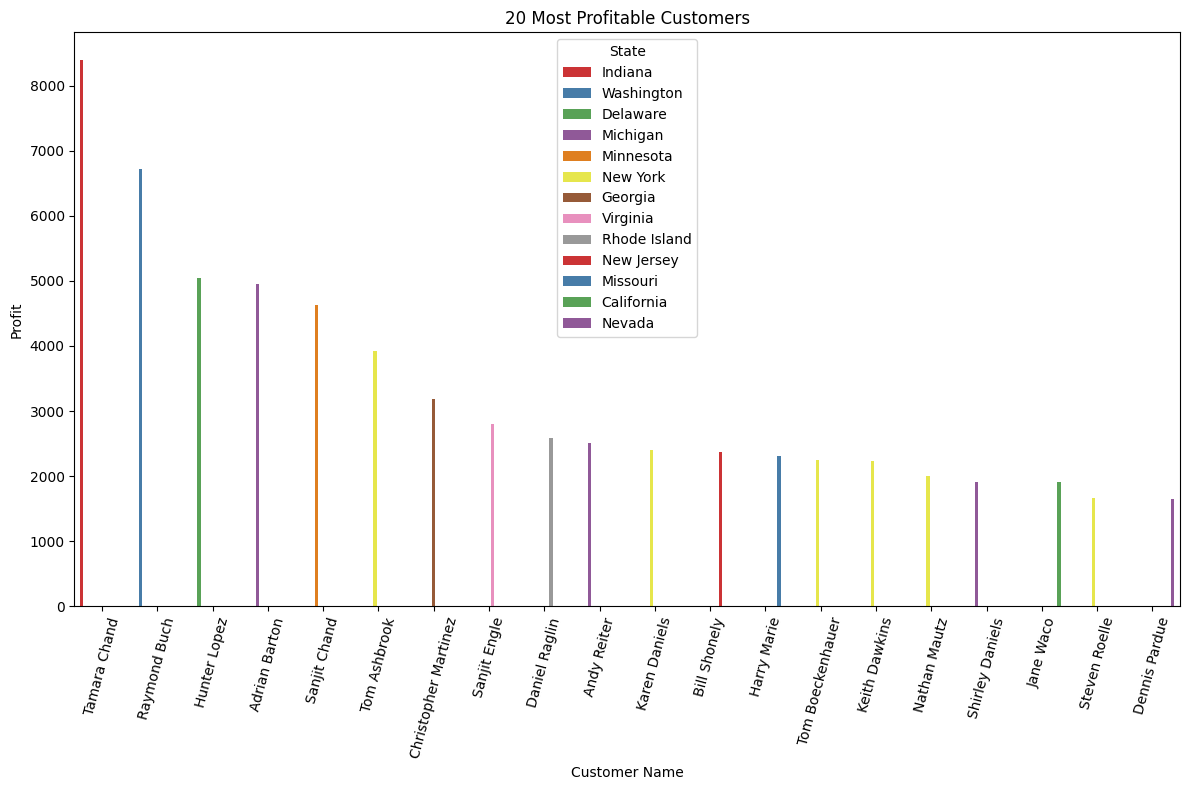

In [83]:
sortedTop20 = df.sort_values(['Profit'], ascending=False).head(20)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
p = sns.barplot(x='Customer Name', y='Profit',hue='State',palette='Set1', data=sortedTop20, ax=ax)
ax.set_title("20 Most Profitable Customers")
ax.set_xticklabels(p.get_xticklabels(), rotation=75)
plt.tight_layout()
plt.show()

Our data reveals that a significant portion of our most profitable customers are located in New York and Michigan. This suggests a potential opportunity to tailor our marketing strategies to better target similar demographics in these regions.

Let's zoom in on customer activity! By examining the order details, we'll begin with the number of unique orders. 
This will reveal the overall volume of purchases and provide a foundation for understanding our customer buying behavior.

In [84]:
# Number of unique orders
df['Order ID'].nunique()

5009

Next, let's explore how quickly we get products to our customers! We'll calculate the time it takes for each order to ship, converting the number of days into a clear format.

In [85]:
# Calculating the time taken for an order to ship and converting the no. of days in int format
df['Shipment Duration']=(pd.to_datetime(df['Ship Date'])-pd.to_datetime(df['Order Date'])).dt.days
df['Shipment Duration']

0       3
1       3
2       4
3       7
4       7
       ..
9989    2
9990    5
9991    5
9992    5
9993    5
Name: Shipment Duration, Length: 9994, dtype: int64

In [86]:
df.iloc[:,[0,3,21]]

,Order ID,Ship Mode,Shipment Duration
0,CA-2016-152156,Second Class,3
1,CA-2016-152156,Second Class,3
2,CA-2016-138688,Second Class,4
3,US-2015-108966,Standard Class,7
4,US-2015-108966,Standard Class,7
...,...,...,...
9989,CA-2014-110422,Second Class,2
9990,CA-2017-121258,Standard Class,5
9991,CA-2017-121258,Standard Class,5
9992,CA-2017-121258,Standard Class,5


Let's learn more about our customers! We can find out things like:

- How many items they typically buy?
- What kinds of things they buy from us?
- When they first started shopping with us?
- When their most recent purchase was?
- Where they tend to order from?

In [87]:
#creating function and appending customer and order info to it.
def agg_customer(x):
    d = []
    d.append(x['Order ID'].count())
    d.append(x['Sales'].sum())
    d.append(x['Profit %'].mean())
    d.append(pd.to_datetime(x['Order Date']).min())
    d.append(pd.to_datetime(x['Order Date']).max())
    d.append(x['Product Name'].unique())
    d.append(x['City'].unique())
    return pd.Series(d, index=['#Purchases','Total_Sales','Average Profit % gained','First_Purchase_Date','Latest_Purchase_Date','Products Purchased','Location_Count'])

In [88]:
#grouping based on Customer ID and applying the function we created above
df_agg = df.groupby('Customer ID').apply(agg_customer)
df_agg

,#Purchases,Total_Sales,Average Profit % gained,First_Purchase_Date,Latest_Purchase_Date,Products Purchased,Location_Count
Customer ID,,,,,,,
AA-10315,11,5563.560,44.527461,2014-03-31,2017-06-29,"[Belkin 325VA UPS Surge Protector, 6', Avery B...","[Minneapolis, San Francisco, Round Rock, New Y..."
AA-10375,15,1056.390,52.349415,2014-04-21,2017-12-11,"[Sterilite Officeware Hinged File Box, Colored...","[Mesa, Omaha, Los Angeles, Salem, Atlanta, Ran..."
AA-10480,12,1790.512,55.580242,2014-05-04,2017-04-15,"[Xerox 1967, DAX Wood Document Frame, Strathmo...","[Concord, Middletown, Springfield, Detroit]"
AA-10645,18,5086.935,42.364755,2014-06-22,2017-11-05,"[Padded Folding Chairs, Black, 4/Carton, Panas...","[Chester, San Francisco, Georgetown, San Diego..."
AB-10015,6,886.156,15.186975,2014-02-18,2016-11-10,"[Global Push Button Manager's Chair, Indigo, N...","[Seattle, Arlington, Oklahoma City]"
...,...,...,...,...,...,...,...
XP-21865,28,2374.658,53.799227,2014-01-20,2017-11-17,[Imation USB 2.0 Swivel Flash Drive USB flash ...,"[San Diego, Everett, Chicago, Los Angeles, Pas..."
YC-21895,8,5454.350,42.235317,2014-11-17,2017-12-26,[Hewlett Packard 610 Color Digital Copier / Pr...,"[San Francisco, Los Angeles, Newark, Dallas, F..."
YS-21880,12,6720.444,37.278442,2015-01-12,2017-12-21,"[4009 Highlighters by Sanford, Letter Size Car...","[Burlington, Oakland, Newark, Seattle, Columbu..."


Let's travel through time within our data! By extracting the year of each order, we can uncover trends in customer behavior over time.

In [89]:
# Extracting the year of order
df['order year']=df['Order Date'].dt.year
df['order year'].head()

0    2016
1    2016
2    2016
3    2015
4    2015
Name: order year, dtype: int32

Alright, money matters! Let's see how much profit each category brings in. This will show us which categories are the real profit powerhouses and where we might need to make some adjustments.

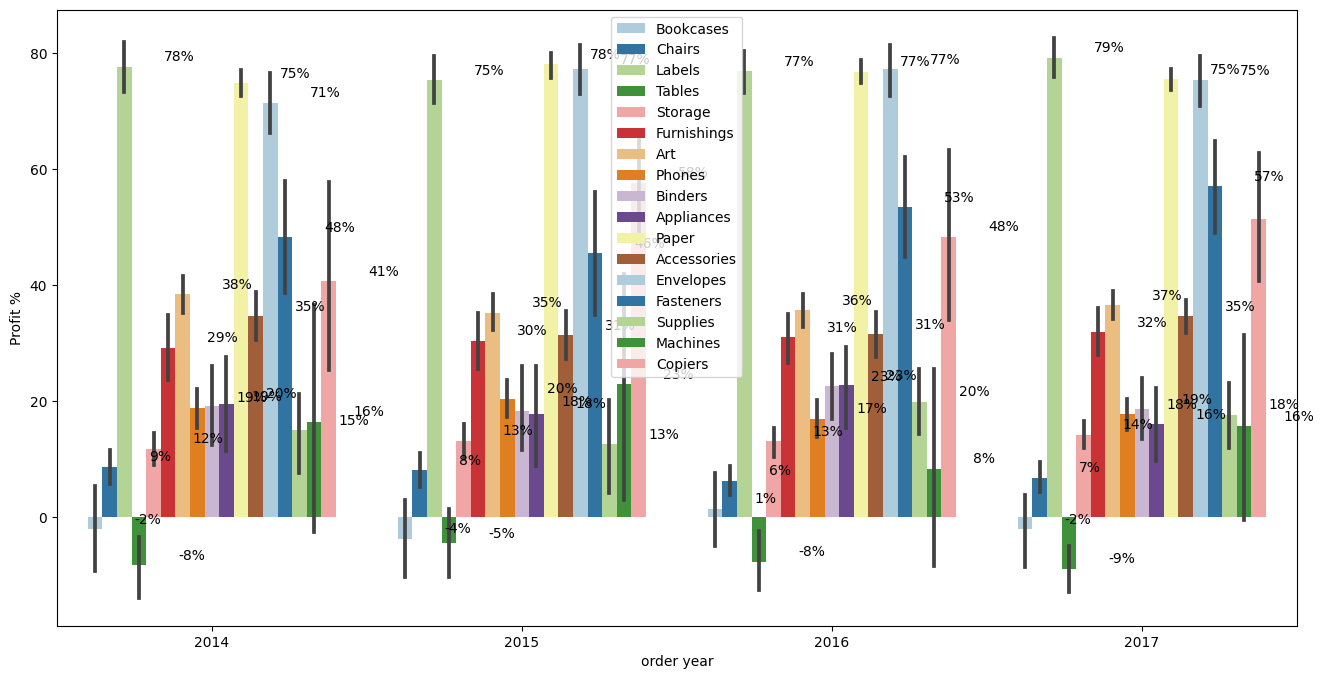

In [90]:
# Calculating Profit gained in each Category
fig, ax = plt.subplots(figsize=(16, 8))  # Create figure and axes together

# Pass data and other arguments directly to sns.barplot
sns.barplot(x='order year', y='Profit %', hue='Sub-Category', palette='Paired', data=df, ax=ax)

# Add legend with 'best' placement
plt.legend(loc='best')  # This line specifies the legend position

# Loop through patches and add annotations
for patch in ax.patches:
    x = patch.get_x() + 0.15  # Adjust x-position for better placement
    y = patch.get_height() + 1  # Adjust y-position for better placement
    ax.annotate('{:.0f}%'.format(patch.get_height()), (x, y))  # Show percentage sign

plt.show()

The profit picture reveals a tale of two sides! While labels, papers, and envelopes boast a healthy profit margin, bookcases and tables lag behind. This calls for a closer look! By leveraging this data, we can identify areas where we can boost profitability for bookcases and tables, ensuring a more balanced and successful product portfolio.

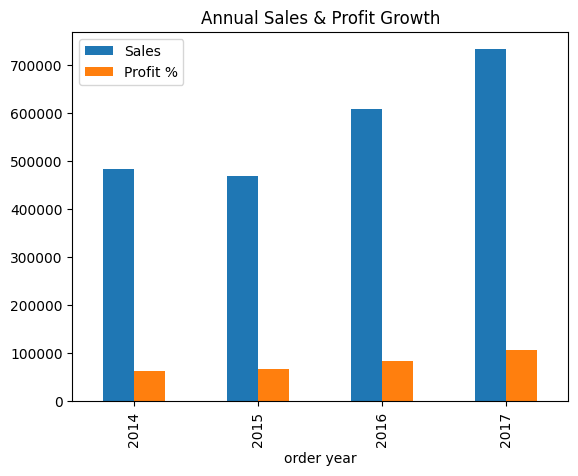

In [91]:
# Sales per year
# Group data by 'order year' and calculate sum for 'Sales' and 'Profit %'
df_grouped = df.groupby('order year')[['Sales', 'Profit %']].agg(sum)

# Plot the grouped data as a bar chart
df_grouped.plot.bar()

# Add title to the plot
plt.title('Annual Sales & Profit Growth')

plt.show()

The data reveals a clear trend! Year-over-year sales growth has translated into increasing profits by the end of 2017. This is a positive sign, but we need to understand the drivers of this growth and identify potential areas for further optimization.

## Conclusion
**Key findings and actionable insights:**

- Our analysis reveals a distinct regional trend: customers in the western United States tend to place more orders from our superstore compared to other regions. This finding suggests potential variations in customer needs or shopping preferences across the country.

- Our data reveals that a significant portion of our most profitable customers are located in New York and Michigan. This suggests a potential opportunity to tailor our marketing strategies to better target similar demographics in these regions.

- Our analysis reveals a significant profit disparity across categories. Labels, papers, and envelopes stand out as true profit champions, boasting margins exceeding 70%. Conversely, bookcases and tables show a concerning trend, with profitability ranging between -2% and -9%. To address this gap and achieve a balanced portfolio, we'll explore strategies such as cost optimization or pricing adjustments.

- Our data reveals a steady increase in sales from the beginning of 2014 to the end of 2017. This growth has translated into significant profit gains, indicating a positive financial trajectory. While the data shows a positive trend in sales growth, a closer look is needed to understand the drivers behind this growth. We recommend segmenting customer data by demographics and purchase history for a more granular analysis.
